In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  0 0 0
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40608, 40608, 40608)

In [5]:
df = pd.DataFrame({'local1':new_dataset1})

In [16]:
(24*1451)/40608

0.857565011820331

In [17]:
train_dataset = df.sample(frac=0.857,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("local3")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
local1,34801.0,250591.348524,384403.282273,0.0,0.0,0.0,427440.0,1478520.0


In [18]:
#레이블
train_labels = train_dataset#.pop('local3')
test_labels = test_dataset#.pop('local3')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [19]:
normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

In [20]:
normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [21]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1, len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),    
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [22]:
model = build_model()

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/1000
870/870 [==============================] - 2s 1ms/step - loss: 182289334272.0000 - mae: 234524.5000 - mse: 182289334272.0000 - val_loss: 80162914304.0000 - val_mae: 165246.6406 - val_mse: 80162914304.0000
Epoch 2/1000
870/870 [==============================] - 1s 1ms/step - loss: 14392252416.0000 - mae: 65594.2031 - mse: 14392252416.0000 - val_loss: 743063488.0000 - val_mae: 24191.9473 - val_mse: 743063488.0000
Epoch 3/1000
870/870 [==============================] - 1s 1ms/step - loss: 556866048.0000 - mae: 21309.8613 - mse: 556866048.0000 - val_loss: 477050272.0000 - val_mae: 19812.4473 - val_mse: 477050272.0000
Epoch 4/1000
870/870 [==============================] - 1s 1ms/step - loss: 434113920.0000 - mae: 18795.8828 - mse: 434113920.0000 - val_loss: 390826432.0000 - val_mae: 17866.2500 - val_mse: 390826432.0000
Epoch 5/1000
870/870 [==============================] - 1s 1ms/step - loss: 347185184.0000 - mae: 16735.5703 - mse: 347185184.0000 - val_loss: 300757728.0000 - 

870/870 [==============================] - 1s 1ms/step - loss: 12569.0586 - mae: 40.4471 - mse: 12569.0586 - val_loss: 165.7696 - val_mae: 6.9071 - val_mse: 165.7696
Epoch 45/1000
870/870 [==============================] - 1s 1ms/step - loss: 442.1289 - mae: 12.1985 - mse: 442.1289 - val_loss: 512.9955 - val_mae: 16.8933 - val_mse: 512.9955
Epoch 46/1000
870/870 [==============================] - 1s 1ms/step - loss: 2724.2241 - mae: 23.6703 - mse: 2724.2241 - val_loss: 169.4058 - val_mae: 7.4099 - val_mse: 169.4058
Epoch 47/1000
870/870 [==============================] - 1s 1ms/step - loss: 3006.3608 - mae: 22.7591 - mse: 3006.3608 - val_loss: 7663.6782 - val_mae: 55.2683 - val_mse: 7663.6782
Epoch 48/1000
870/870 [==============================] - 1s 1ms/step - loss: 8693.1230 - mae: 24.6084 - mse: 8693.1230 - val_loss: 158.4071 - val_mae: 7.2963 - val_mse: 158.4071
Epoch 49/1000
870/870 [==============================] - 1s 1ms/step - loss: 7187.3608 - mae: 25.2832 - mse: 7187.3608 -

Epoch 90/1000
870/870 [==============================] - 1s 1ms/step - loss: 7932.4355 - mae: 31.3952 - mse: 7932.4355 - val_loss: 138.2622 - val_mae: 7.5384 - val_mse: 138.2622
Epoch 91/1000
870/870 [==============================] - 1s 1ms/step - loss: 5744.0420 - mae: 23.9167 - mse: 5744.0420 - val_loss: 121.6392 - val_mae: 7.4439 - val_mse: 121.6392
Epoch 92/1000
870/870 [==============================] - 1s 1ms/step - loss: 294.2799 - mae: 10.2469 - mse: 294.2799 - val_loss: 141.6871 - val_mae: 8.9150 - val_mse: 141.6871
Epoch 93/1000
870/870 [==============================] - 1s 1ms/step - loss: 3877.4822 - mae: 18.6205 - mse: 3877.4822 - val_loss: 102.0985 - val_mae: 5.8331 - val_mse: 102.0985
Epoch 94/1000
870/870 [==============================] - 1s 1ms/step - loss: 6430.7876 - mae: 27.6665 - mse: 6430.7876 - val_loss: 136.0255 - val_mae: 7.3247 - val_mse: 136.0255
Epoch 95/1000
870/870 [==============================] - 1s 1ms/step - loss: 7452.2148 - mae: 21.8588 - mse: 745

Epoch 136/1000
870/870 [==============================] - 1s 1ms/step - loss: 1091.0835 - mae: 15.5240 - mse: 1091.0835 - val_loss: 1693.5762 - val_mae: 26.5471 - val_mse: 1693.5762
Epoch 137/1000
870/870 [==============================] - 1s 1ms/step - loss: 5475.1787 - mae: 24.2156 - mse: 5475.1787 - val_loss: 105.7234 - val_mae: 6.7057 - val_mse: 105.7234
Epoch 138/1000
870/870 [==============================] - 1s 1ms/step - loss: 1570.1093 - mae: 18.5203 - mse: 1570.1093 - val_loss: 6328.9136 - val_mae: 48.2171 - val_mse: 6328.9136
Epoch 139/1000
870/870 [==============================] - 1s 1ms/step - loss: 11591.3486 - mae: 26.5891 - mse: 11591.3486 - val_loss: 83.0013 - val_mae: 5.4673 - val_mse: 83.0013
Epoch 140/1000
870/870 [==============================] - 1s 1ms/step - loss: 1299.9631 - mae: 15.7714 - mse: 1299.9631 - val_loss: 4631.3901 - val_mae: 43.6646 - val_mse: 4631.3901
Epoch 141/1000
870/870 [==============================] - 1s 1ms/step - loss: 44898.8555 - mae: 

Epoch 182/1000
870/870 [==============================] - 2s 2ms/step - loss: 9391.6963 - mae: 27.2125 - mse: 9391.6963 - val_loss: 62.8783 - val_mae: 4.7288 - val_mse: 62.8783
Epoch 183/1000
870/870 [==============================] - 2s 2ms/step - loss: 582.5268 - mae: 10.3746 - mse: 582.5268 - val_loss: 34640.6602 - val_mae: 121.5071 - val_mse: 34640.6602
Epoch 184/1000
870/870 [==============================] - 2s 2ms/step - loss: 5103.8267 - mae: 24.8838 - mse: 5103.8267 - val_loss: 179.6796 - val_mae: 10.1527 - val_mse: 179.6796
Epoch 185/1000
870/870 [==============================] - 2s 2ms/step - loss: 5929.0059 - mae: 30.4449 - mse: 5929.0059 - val_loss: 81.4395 - val_mae: 6.8257 - val_mse: 81.4395
Epoch 186/1000
870/870 [==============================] - 2s 2ms/step - loss: 562.0665 - mae: 12.3662 - mse: 562.0665 - val_loss: 1766.5714 - val_mae: 31.2057 - val_mse: 1766.5714
Epoch 187/1000
870/870 [==============================] - 2s 2ms/step - loss: 1649.4749 - mae: 18.9017 

Epoch 228/1000
870/870 [==============================] - 2s 2ms/step - loss: 1824.2264 - mae: 15.9885 - mse: 1824.2264 - val_loss: 36940.1758 - val_mae: 131.1810 - val_mse: 36940.1758
Epoch 229/1000
870/870 [==============================] - 1s 2ms/step - loss: 2403.2693 - mae: 17.8645 - mse: 2403.2693 - val_loss: 47.2394 - val_mae: 4.9269 - val_mse: 47.2394
Epoch 230/1000
870/870 [==============================] - 1s 2ms/step - loss: 1873.2848 - mae: 15.0158 - mse: 1873.2848 - val_loss: 990.8949 - val_mae: 20.9129 - val_mse: 990.8949
Epoch 231/1000
870/870 [==============================] - 1s 2ms/step - loss: 4283.0205 - mae: 24.7330 - mse: 4283.0205 - val_loss: 731.2997 - val_mae: 15.9690 - val_mse: 731.2997
Epoch 232/1000
870/870 [==============================] - 2s 2ms/step - loss: 14533.5459 - mae: 38.5158 - mse: 14533.5459 - val_loss: 76.2973 - val_mae: 5.4965 - val_mse: 76.2973
Epoch 233/1000
870/870 [==============================] - 1s 2ms/step - loss: 79.9123 - mae: 5.6139

Epoch 274/1000
870/870 [==============================] - 2s 2ms/step - loss: 7500.1436 - mae: 21.7552 - mse: 7500.1436 - val_loss: 80.0883 - val_mae: 5.9164 - val_mse: 80.0883
Epoch 275/1000
870/870 [==============================] - 2s 2ms/step - loss: 239.5081 - mae: 7.2315 - mse: 239.5081 - val_loss: 526.6309 - val_mae: 13.4054 - val_mse: 526.6309
Epoch 276/1000
870/870 [==============================] - 2s 2ms/step - loss: 1494.6394 - mae: 16.9582 - mse: 1494.6394 - val_loss: 534.1851 - val_mae: 17.3184 - val_mse: 534.1851
Epoch 277/1000
870/870 [==============================] - 1s 2ms/step - loss: 3870.7925 - mae: 22.0563 - mse: 3870.7925 - val_loss: 36.3450 - val_mae: 3.7535 - val_mse: 36.3450
Epoch 278/1000
870/870 [==============================] - 2s 2ms/step - loss: 3929.3772 - mae: 23.8705 - mse: 3929.3772 - val_loss: 17998.0215 - val_mae: 75.2742 - val_mse: 17998.0215
Epoch 279/1000
870/870 [==============================] - 2s 2ms/step - loss: 25385.5195 - mae: 36.6101 -

Epoch 320/1000
870/870 [==============================] - 2s 2ms/step - loss: 2012.2406 - mae: 16.6786 - mse: 2012.2406 - val_loss: 35.8813 - val_mae: 4.3350 - val_mse: 35.8813
Epoch 321/1000
870/870 [==============================] - 1s 2ms/step - loss: 1456.2595 - mae: 15.9461 - mse: 1456.2595 - val_loss: 483.4526 - val_mae: 18.0385 - val_mse: 483.4526
Epoch 322/1000
870/870 [==============================] - 1s 2ms/step - loss: 6405.4795 - mae: 21.3904 - mse: 6405.4795 - val_loss: 105.0336 - val_mae: 6.1417 - val_mse: 105.0336
Epoch 323/1000
870/870 [==============================] - 2s 2ms/step - loss: 27762.4004 - mae: 40.5806 - mse: 27762.4004 - val_loss: 43.6826 - val_mae: 4.3677 - val_mse: 43.6826
Epoch 324/1000
870/870 [==============================] - 1s 2ms/step - loss: 45.6775 - mae: 4.2606 - mse: 45.6775 - val_loss: 37.8024 - val_mae: 3.4975 - val_mse: 37.8024
Epoch 325/1000
870/870 [==============================] - 1s 2ms/step - loss: 89.9199 - mae: 5.6283 - mse: 89.919

Epoch 366/1000
870/870 [==============================] - 2s 2ms/step - loss: 2859.2097 - mae: 19.7203 - mse: 2859.2097 - val_loss: 532.6246 - val_mae: 13.4763 - val_mse: 532.6246
Epoch 367/1000
870/870 [==============================] - 1s 2ms/step - loss: 1678.0151 - mae: 16.2830 - mse: 1678.0151 - val_loss: 6841.3804 - val_mae: 46.0760 - val_mse: 6841.3804
Epoch 368/1000
870/870 [==============================] - 1s 2ms/step - loss: 6175.5679 - mae: 19.1137 - mse: 6175.5679 - val_loss: 32.9751 - val_mae: 3.2153 - val_mse: 32.9751
Epoch 369/1000
870/870 [==============================] - 2s 2ms/step - loss: 796.9479 - mae: 11.8934 - mse: 796.9479 - val_loss: 158.2432 - val_mae: 8.7912 - val_mse: 158.2432
Epoch 370/1000
870/870 [==============================] - 2s 2ms/step - loss: 13293.1699 - mae: 23.8314 - mse: 13293.1699 - val_loss: 29.7449 - val_mae: 3.6708 - val_mse: 29.7449
Epoch 371/1000
870/870 [==============================] - 2s 2ms/step - loss: 117.7006 - mae: 5.8886 - ms

870/870 [==============================] - 2s 2ms/step - loss: 692.3632 - mae: 9.5227 - mse: 692.3632 - val_loss: 83.5980 - val_mae: 6.1287 - val_mse: 83.5980
Epoch 413/1000
870/870 [==============================] - 1s 2ms/step - loss: 8334.3408 - mae: 27.7323 - mse: 8334.3408 - val_loss: 1591.5184 - val_mae: 25.9132 - val_mse: 1591.5184
Epoch 414/1000
870/870 [==============================] - 1s 2ms/step - loss: 301.2735 - mae: 8.3738 - mse: 301.2735 - val_loss: 55.4137 - val_mae: 5.0485 - val_mse: 55.4137
Epoch 415/1000
870/870 [==============================] - 2s 2ms/step - loss: 4968.0630 - mae: 19.6052 - mse: 4968.0630 - val_loss: 41.8847 - val_mae: 4.3175 - val_mse: 41.8847
Epoch 416/1000
870/870 [==============================] - 2s 2ms/step - loss: 739.4689 - mae: 10.8031 - mse: 739.4689 - val_loss: 30.1150 - val_mae: 4.1744 - val_mse: 30.1150
Epoch 417/1000
870/870 [==============================] - 2s 2ms/step - loss: 4231.1499 - mae: 16.8294 - mse: 4231.1499 - val_loss: 8

870/870 [==============================] - 1s 2ms/step - loss: 4570.3730 - mae: 17.0162 - mse: 4570.3730 - val_loss: 22.5774 - val_mae: 2.6895 - val_mse: 22.5774
Epoch 459/1000
870/870 [==============================] - 2s 2ms/step - loss: 346.4481 - mae: 6.8368 - mse: 346.4481 - val_loss: 58906.9531 - val_mae: 133.0447 - val_mse: 58906.9531
Epoch 460/1000
870/870 [==============================] - 2s 2ms/step - loss: 3795.0632 - mae: 19.8047 - mse: 3795.0632 - val_loss: 93.0051 - val_mae: 6.3989 - val_mse: 93.0051
Epoch 461/1000
870/870 [==============================] - 2s 2ms/step - loss: 1129.4410 - mae: 12.8155 - mse: 1129.4410 - val_loss: 226.4250 - val_mae: 10.2811 - val_mse: 226.4250
Epoch 462/1000
870/870 [==============================] - 1s 2ms/step - loss: 6445.9287 - mae: 26.0801 - mse: 6445.9287 - val_loss: 31.8825 - val_mae: 3.8315 - val_mse: 31.8825
Epoch 463/1000
870/870 [==============================] - 1s 2ms/step - loss: 2114.9985 - mae: 12.2713 - mse: 2114.9985 - 

870/870 [==============================] - 2s 2ms/step - loss: 61.6997 - mae: 4.4033 - mse: 61.6997 - val_loss: 36.1704 - val_mae: 4.0626 - val_mse: 36.1704
Epoch 505/1000
870/870 [==============================] - 2s 2ms/step - loss: 2257.0303 - mae: 20.4832 - mse: 2257.0303 - val_loss: 572.6844 - val_mae: 18.6082 - val_mse: 572.6844
Epoch 506/1000
870/870 [==============================] - 2s 2ms/step - loss: 4131.2261 - mae: 18.3629 - mse: 4131.2261 - val_loss: 48.8071 - val_mae: 6.3047 - val_mse: 48.8071
Epoch 507/1000
870/870 [==============================] - 2s 2ms/step - loss: 1165.0986 - mae: 12.8653 - mse: 1165.0986 - val_loss: 22.0395 - val_mae: 2.8200 - val_mse: 22.0395
Epoch 508/1000
870/870 [==============================] - 2s 2ms/step - loss: 1698.4935 - mae: 16.4401 - mse: 1698.4935 - val_loss: 5147.2915 - val_mae: 47.9247 - val_mse: 5147.2915
Epoch 509/1000
870/870 [==============================] - 2s 2ms/step - loss: 6506.7852 - mae: 24.6543 - mse: 6506.7852 - val_l

870/870 [==============================] - 2s 3ms/step - loss: 2858.4641 - mae: 15.8840 - mse: 2858.4641 - val_loss: 15.5347 - val_mae: 2.5257 - val_mse: 15.5347
Epoch 551/1000
870/870 [==============================] - 2s 3ms/step - loss: 10263.4648 - mae: 19.8092 - mse: 10263.4648 - val_loss: 54.9281 - val_mae: 4.4842 - val_mse: 54.9281
Epoch 552/1000
870/870 [==============================] - 2s 2ms/step - loss: 41.4830 - mae: 3.6675 - mse: 41.4830 - val_loss: 15.6409 - val_mae: 2.3386 - val_mse: 15.6409
Epoch 553/1000
870/870 [==============================] - 2s 2ms/step - loss: 4165.0703 - mae: 16.7735 - mse: 4165.0703 - val_loss: 19.1531 - val_mae: 2.5860 - val_mse: 19.1531
Epoch 554/1000
870/870 [==============================] - 2s 2ms/step - loss: 2004.4854 - mae: 16.3734 - mse: 2004.4854 - val_loss: 50.3045 - val_mae: 4.5207 - val_mse: 50.3045
Epoch 555/1000
870/870 [==============================] - 2s 2ms/step - loss: 527.9950 - mae: 10.9544 - mse: 527.9950 - val_loss: 155

870/870 [==============================] - 2s 2ms/step - loss: 367.7847 - mae: 7.5985 - mse: 367.7847 - val_loss: 50.9244 - val_mae: 5.1564 - val_mse: 50.9244
Epoch 597/1000
870/870 [==============================] - 2s 2ms/step - loss: 1442.0057 - mae: 16.8637 - mse: 1442.0057 - val_loss: 980.8762 - val_mae: 19.8794 - val_mse: 980.8762
Epoch 598/1000
870/870 [==============================] - 2s 2ms/step - loss: 3420.9202 - mae: 17.9793 - mse: 3420.9202 - val_loss: 22.8471 - val_mae: 3.1787 - val_mse: 22.8471
Epoch 599/1000
870/870 [==============================] - 2s 2ms/step - loss: 230.1190 - mae: 6.4196 - mse: 230.1190 - val_loss: 1950.9518 - val_mae: 30.4629 - val_mse: 1950.9518
Epoch 600/1000
870/870 [==============================] - 2s 2ms/step - loss: 16992.0430 - mae: 30.9006 - mse: 16992.0430 - val_loss: 22.4499 - val_mae: 3.0205 - val_mse: 22.4499
Epoch 601/1000
870/870 [==============================] - 2s 2ms/step - loss: 20.9453 - mae: 2.7788 - mse: 20.9453 - val_loss:

870/870 [==============================] - 2s 2ms/step - loss: 60.7379 - mae: 4.0960 - mse: 60.7379 - val_loss: 845.1368 - val_mae: 17.4120 - val_mse: 845.1368
Epoch 643/1000
870/870 [==============================] - 2s 2ms/step - loss: 4912.8423 - mae: 19.2637 - mse: 4912.8423 - val_loss: 15.0395 - val_mae: 2.3473 - val_mse: 15.0395
Epoch 644/1000
870/870 [==============================] - 2s 2ms/step - loss: 4730.7759 - mae: 15.1722 - mse: 4730.7759 - val_loss: 41.4506 - val_mae: 4.7627 - val_mse: 41.4506
Epoch 645/1000
870/870 [==============================] - 2s 2ms/step - loss: 2985.0566 - mae: 13.5362 - mse: 2985.0566 - val_loss: 14.9638 - val_mae: 2.1270 - val_mse: 14.9638
Epoch 646/1000
870/870 [==============================] - 2s 2ms/step - loss: 2909.6011 - mae: 11.9083 - mse: 2909.6011 - val_loss: 732.9478 - val_mae: 20.4127 - val_mse: 732.9478
Epoch 647/1000
870/870 [==============================] - 2s 2ms/step - loss: 2924.3127 - mae: 18.1638 - mse: 2924.3127 - val_los

870/870 [==============================] - 2s 3ms/step - loss: 7898.1982 - mae: 18.9801 - mse: 7898.1982 - val_loss: 13.8090 - val_mae: 2.5393 - val_mse: 13.8090
Epoch 689/1000
870/870 [==============================] - 2s 3ms/step - loss: 6945.1084 - mae: 21.4063 - mse: 6945.1084 - val_loss: 28.7375 - val_mae: 4.5433 - val_mse: 28.7375
Epoch 690/1000
870/870 [==============================] - 2s 3ms/step - loss: 37.6334 - mae: 3.3447 - mse: 37.6334 - val_loss: 34.5844 - val_mae: 3.8431 - val_mse: 34.5844
Epoch 691/1000
870/870 [==============================] - 3s 3ms/step - loss: 330.5049 - mae: 7.0611 - mse: 330.5049 - val_loss: 31165.8379 - val_mae: 115.6798 - val_mse: 31165.8379
Epoch 692/1000
870/870 [==============================] - 3s 3ms/step - loss: 2798.1499 - mae: 16.4391 - mse: 2798.1499 - val_loss: 468.6846 - val_mae: 18.3678 - val_mse: 468.6846
Epoch 693/1000
870/870 [==============================] - 2s 3ms/step - loss: 9486.0576 - mae: 27.9412 - mse: 9486.0576 - val_l

870/870 [==============================] - 3s 3ms/step - loss: 12124.0732 - mae: 24.8596 - mse: 12124.0732 - val_loss: 20.8502 - val_mae: 3.3337 - val_mse: 20.8502
Epoch 735/1000
870/870 [==============================] - 3s 3ms/step - loss: 22.4839 - mae: 2.9576 - mse: 22.4839 - val_loss: 15.6781 - val_mae: 2.2633 - val_mse: 15.6781
Epoch 736/1000
870/870 [==============================] - 3s 3ms/step - loss: 677.3654 - mae: 9.0265 - mse: 677.3654 - val_loss: 25.4442 - val_mae: 4.3828 - val_mse: 25.4442
Epoch 737/1000
870/870 [==============================] - 2s 3ms/step - loss: 4523.1060 - mae: 18.5244 - mse: 4523.1060 - val_loss: 538.2463 - val_mae: 12.9319 - val_mse: 538.2463
Epoch 738/1000
870/870 [==============================] - 2s 3ms/step - loss: 13068.6426 - mae: 20.6947 - mse: 13068.6426 - val_loss: 23.1019 - val_mae: 2.5314 - val_mse: 23.1019
Epoch 739/1000
870/870 [==============================] - 2s 3ms/step - loss: 50.0442 - mae: 4.0630 - mse: 50.0442 - val_loss: 14.0

870/870 [==============================] - 2s 3ms/step - loss: 118.4307 - mae: 5.4434 - mse: 118.4307 - val_loss: 49.2439 - val_mae: 4.0611 - val_mse: 49.2439
Epoch 781/1000
870/870 [==============================] - 2s 3ms/step - loss: 6607.7197 - mae: 18.6431 - mse: 6607.7197 - val_loss: 76.0407 - val_mae: 5.1360 - val_mse: 76.0407
Epoch 782/1000
870/870 [==============================] - 3s 3ms/step - loss: 1624.3755 - mae: 12.7292 - mse: 1624.3755 - val_loss: 46.8119 - val_mae: 5.5465 - val_mse: 46.8119
Epoch 783/1000
870/870 [==============================] - 3s 4ms/step - loss: 1668.8711 - mae: 13.0946 - mse: 1668.8711 - val_loss: 2865.8044 - val_mae: 30.4130 - val_mse: 2865.8044
Epoch 784/1000
870/870 [==============================] - 3s 4ms/step - loss: 1600.7518 - mae: 13.4382 - mse: 1600.7518 - val_loss: 25.5330 - val_mae: 4.1825 - val_mse: 25.5330
Epoch 785/1000
870/870 [==============================] - 3s 3ms/step - loss: 5266.6733 - mae: 23.1181 - mse: 5266.6733 - val_lo

870/870 [==============================] - 3s 3ms/step - loss: 1240.3668 - mae: 13.0956 - mse: 1240.3668 - val_loss: 10.1020 - val_mae: 1.7273 - val_mse: 10.1020
Epoch 827/1000
870/870 [==============================] - 3s 3ms/step - loss: 1465.0310 - mae: 12.5039 - mse: 1465.0310 - val_loss: 212.9482 - val_mae: 13.6779 - val_mse: 212.9482
Epoch 828/1000
870/870 [==============================] - 3s 4ms/step - loss: 18363.5547 - mae: 51.1733 - mse: 18363.5547 - val_loss: 14.9988 - val_mae: 2.5193 - val_mse: 14.9988
Epoch 829/1000
870/870 [==============================] - 3s 4ms/step - loss: 12.8003 - mae: 2.1616 - mse: 12.8003 - val_loss: 10.3962 - val_mae: 2.2855 - val_mse: 10.3962
Epoch 830/1000
870/870 [==============================] - 3s 4ms/step - loss: 18.8084 - mae: 2.6434 - mse: 18.8084 - val_loss: 35.2375 - val_mae: 4.3190 - val_mse: 35.2375
Epoch 831/1000
870/870 [==============================] - 3s 4ms/step - loss: 899.1651 - mae: 12.7457 - mse: 899.1651 - val_loss: 52.72

870/870 [==============================] - 3s 3ms/step - loss: 10498.4600 - mae: 21.2592 - mse: 10498.4600 - val_loss: 9.8955 - val_mae: 1.7936 - val_mse: 9.8955
Epoch 873/1000
870/870 [==============================] - 3s 4ms/step - loss: 31.3107 - mae: 2.8818 - mse: 31.3107 - val_loss: 1256.7301 - val_mae: 20.9448 - val_mse: 1256.7301
Epoch 874/1000
870/870 [==============================] - 3s 4ms/step - loss: 2042.7454 - mae: 19.5379 - mse: 2042.7454 - val_loss: 312.1826 - val_mae: 16.4117 - val_mse: 312.1826
Epoch 875/1000
870/870 [==============================] - 3s 4ms/step - loss: 1862.6996 - mae: 15.7138 - mse: 1862.6996 - val_loss: 6829.8223 - val_mae: 47.1019 - val_mse: 6829.8223
Epoch 876/1000
870/870 [==============================] - 3s 4ms/step - loss: 3666.0432 - mae: 19.3332 - mse: 3666.0432 - val_loss: 400.2416 - val_mae: 17.4665 - val_mse: 400.2416
Epoch 877/1000
870/870 [==============================] - 3s 4ms/step - loss: 491.6366 - mae: 8.1982 - mse: 491.6366 - 

870/870 [==============================] - 3s 4ms/step - loss: 6107.9214 - mae: 17.0915 - mse: 6107.9214 - val_loss: 51.4552 - val_mae: 4.5628 - val_mse: 51.4552
Epoch 919/1000
870/870 [==============================] - 4s 4ms/step - loss: 2058.3513 - mae: 12.0256 - mse: 2058.3513 - val_loss: 9.7058 - val_mae: 2.0172 - val_mse: 9.7058
Epoch 920/1000
870/870 [==============================] - 3s 4ms/step - loss: 1353.2976 - mae: 11.1082 - mse: 1353.2976 - val_loss: 36.3079 - val_mae: 4.5650 - val_mse: 36.3079
Epoch 921/1000
870/870 [==============================] - 3s 4ms/step - loss: 4759.6177 - mae: 18.5543 - mse: 4759.6177 - val_loss: 27.8042 - val_mae: 3.4308 - val_mse: 27.8042
Epoch 922/1000
870/870 [==============================] - 3s 4ms/step - loss: 9199.7910 - mae: 18.9089 - mse: 9199.7910 - val_loss: 8951.0361 - val_mae: 59.6005 - val_mse: 8951.0361
Epoch 923/1000
870/870 [==============================] - 3s 3ms/step - loss: 146.7755 - mae: 3.5675 - mse: 146.7755 - val_loss

Epoch 965/1000
870/870 [==============================] - 3s 3ms/step - loss: 201.8256 - mae: 4.7309 - mse: 201.8256 - val_loss: 8.9192 - val_mae: 1.8688 - val_mse: 8.9192
Epoch 966/1000
870/870 [==============================] - 3s 3ms/step - loss: 562.7725 - mae: 9.2063 - mse: 562.7725 - val_loss: 7.2541 - val_mae: 1.5483 - val_mse: 7.2541
Epoch 967/1000
870/870 [==============================] - 3s 3ms/step - loss: 20507.5820 - mae: 22.1041 - mse: 20507.5820 - val_loss: 12.4929 - val_mae: 2.2377 - val_mse: 12.4929
Epoch 968/1000
870/870 [==============================] - 3s 3ms/step - loss: 13.2940 - mae: 2.1715 - mse: 13.2940 - val_loss: 91.5602 - val_mae: 6.5519 - val_mse: 91.5602
Epoch 969/1000
870/870 [==============================] - 3s 3ms/step - loss: 1628.4843 - mae: 8.1932 - mse: 1628.4843 - val_loss: 988408.3125 - val_mae: 612.4286 - val_mse: 988408.3125
Epoch 970/1000
870/870 [==============================] - 3s 3ms/step - loss: 6540.1377 - mae: 11.4450 - mse: 6540.1377

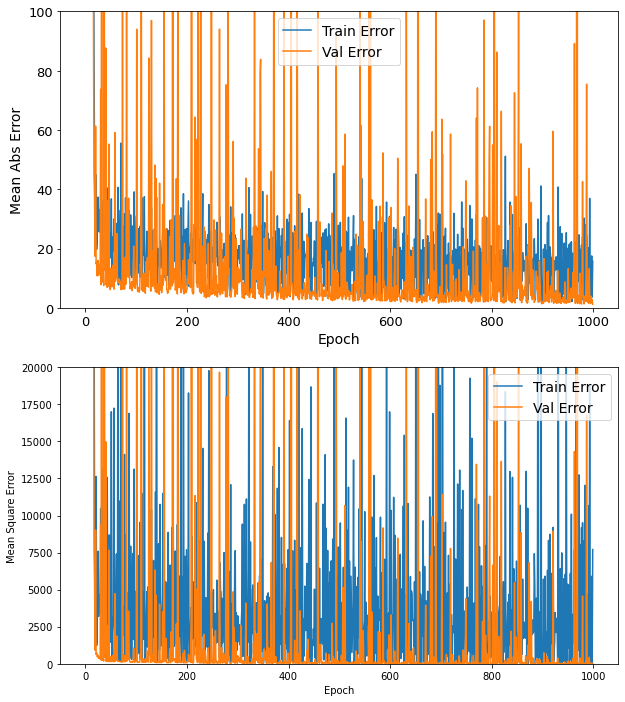

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean Abs Error', fontsize=14)
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,100])
    plt.legend(fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20000])
    plt.legend(fontsize=14)
    plt.show()

plot_history(history)

In [27]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

182/182 - 0s - loss: 7.0469 - mae: 1.2759 - mse: 7.0469 - 279ms/epoch - 2ms/step
테스트 세트의 평균 절대 오차:  1.28 local1


In [ ]:
255/255 - 0s - loss: 126.4473 - mae: 6.6891 - mse: 126.4473 - 141ms/epoch - 552us/step
테스트 세트의 평균 절대 오차:  6.69 local1

In [ ]:
255/255 - 0s - loss: 2.1827 - mae: 0.8232 - mse: 2.1827 - 198ms/epoch - 776us/step
테스트 세트의 평균 절대 오차:  0.82 local1